In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets Goo..

**First we'll take a look at our dataset** 


In [247]:
model_path = "/content/drive/MyDrive/Projects/mental-health/models"

In [248]:
df = pd.read_csv("/content/drive/MyDrive/Projects/mental-health/data.csv")
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Age has one null column we are going to drop it

In [250]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    object 
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you have Panic attack?                     100 non-null    obj

In [251]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


I am going to drop the timestamp column because it adds no information,

I am also going to rename some columns because I don't care

In [252]:
df = df.drop("Timestamp",axis=1)

In [253]:
df.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [254]:
df.rename(columns={'Choose your gender':"gender",'What is your course?':"course",'Your current year of Study':"year",'What is your CGPA?':"CGPA",
                   'Do you have Depression?':"depression",'Do you have Anxiety?':"anxiety",'Do you have Panic attack?':"stress",
                   'Did you seek any specialist for a treatment?':"treatment"},inplace=True)
df.head()

,gender,Age,course,year,CGPA,Marital status,depression,anxiety,stress,treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Better!

Our target variables are : depression,anxiety,stress

I am going to make seperate model for each variable

#### EDA
**Time for some EDA!**

Derpressed vs Non depressed count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


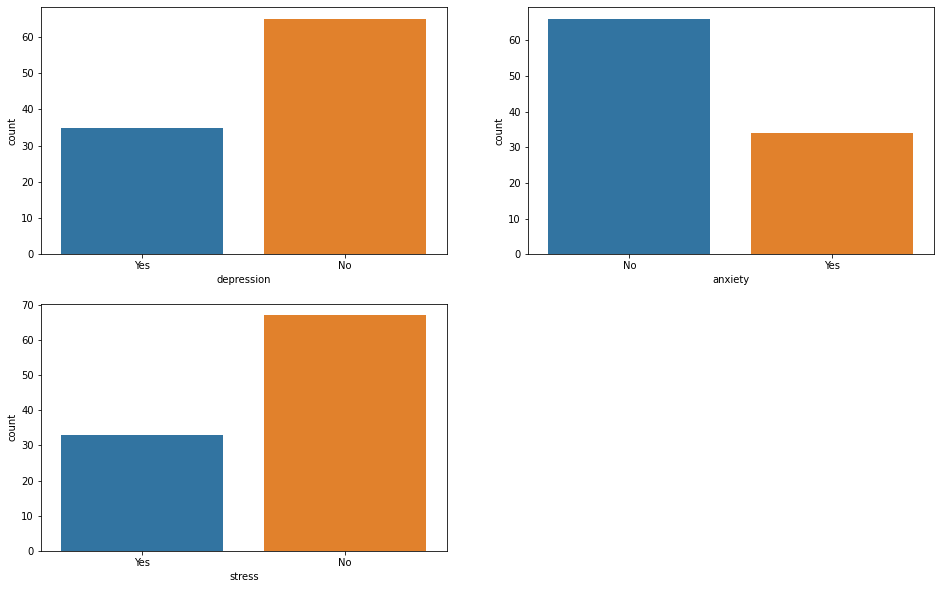

In [255]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["depression"])
plt.subplot(2,2,2)
sns.countplot(df["anxiety"])
plt.subplot(2,2,3)
sns.countplot(df["stress"])

For each target variable there are more "YES" than "NO"

does this mean majority of our sample set have good mental health and have no problems?

**Lets Check!**

In [256]:
df['depression_num'] = df["depression"].map({"Yes":1,"No":0})
df['anxiety_num'] = df["anxiety"].map({"Yes":1,"No":0})
df['stress_num'] = df["stress"].map({"Yes":1,"No":0})
df.head(2)

,gender,Age,course,year,CGPA,Marital status,depression,anxiety,stress,treatment,depression_num,anxiety_num,stress_num
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1,0,1
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,0,1,0


In [257]:
def getVal(val):
  if val > 0:
    return 1
  else:
    return 0

In [258]:
df["any_one"] = (df["depression_num"] + df["anxiety_num"] + df["stress_num"])
df["any_one"] = df["any_one"].apply(getVal)
df.head(2)

,gender,Age,course,year,CGPA,Marital status,depression,anxiety,stress,treatment,depression_num,anxiety_num,stress_num,any_one
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1,0,1,1
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,0,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


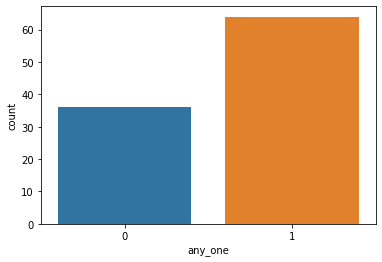

In [259]:
sns.countplot(df["any_one"])

WOW!

so majority of our sample set is suffering from atleast one condition ie (stress or anxiety or depression)

Thats sad 

Impact of gender on our target variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

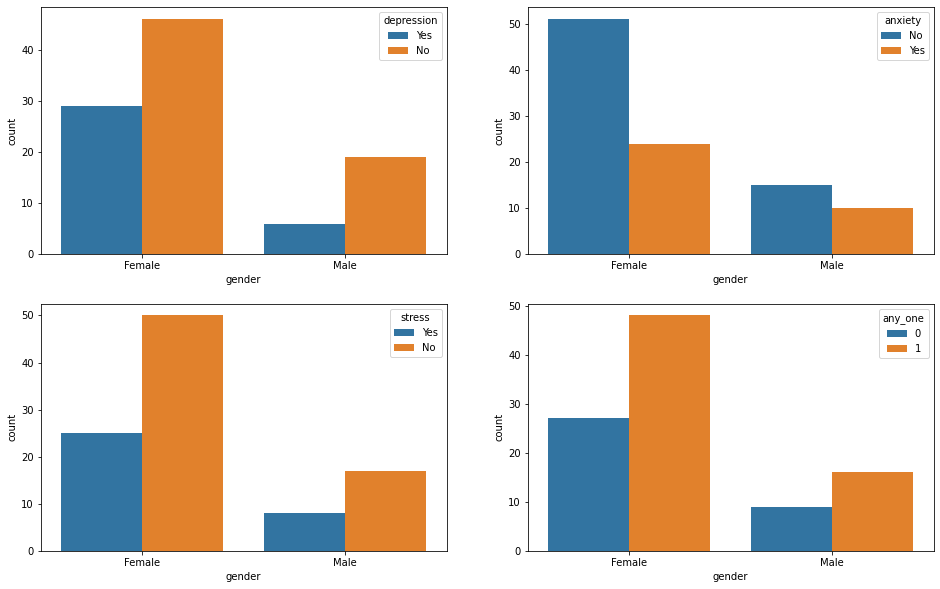

In [260]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["gender"],hue=df['depression'])
plt.subplot(2,2,2)
sns.countplot(df["gender"],hue=df['anxiety'])
plt.subplot(2,2,3)
sns.countplot(df["gender"],hue=df['stress'])
plt.subplot(2,2,4)
sns.countplot(df["gender"],hue=df['any_one'])

Similar ratio between male and female

time to check another variable

lets check for year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


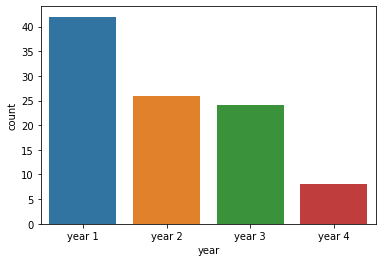

In [261]:
df["year"] = df['year'].str.lower()
sns.countplot(df["year"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

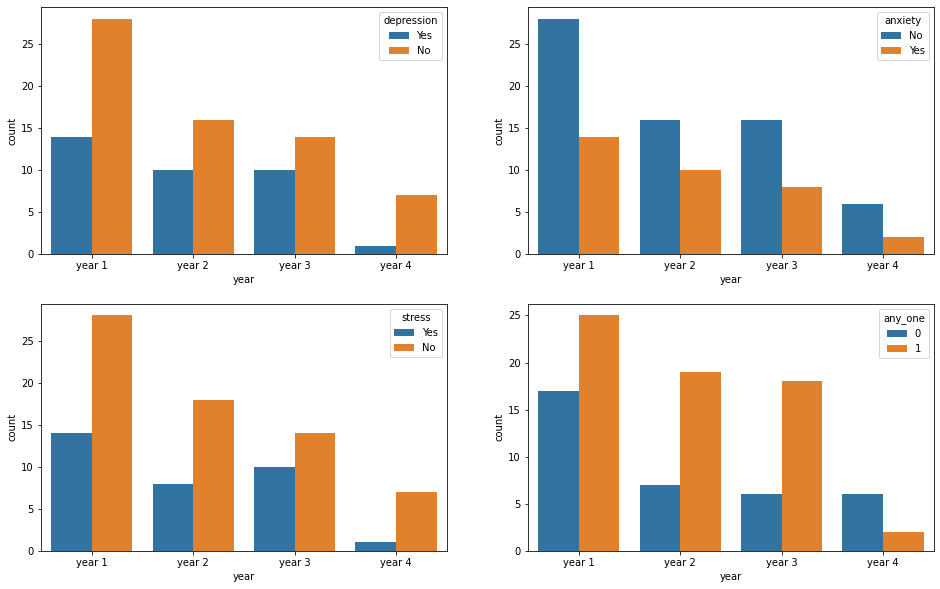

In [262]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["year"],hue=df['depression'])
plt.subplot(2,2,2)
sns.countplot(df["year"],hue=df['anxiety'])
plt.subplot(2,2,3)
sns.countplot(df["year"],hue=df['stress'])
plt.subplot(2,2,4)
sns.countplot(df["year"],hue=df['any_one'])

Except 4th year students year 1st,2nd,3rd students have atleast one problem

GG 4th year students

Lets check for courses

In [263]:
df['course'].value_counts()[:3]

BCS            18
Engineering    17
BIT             9
Name: course, dtype: int64

I am going to select top 3 courses and group all the other ones into the "OTHER" category

In [264]:
courses = ["BCS","Engineering","BIT"] 

In [265]:
def getCourse(course):
  if course not in courses:
    return "other"
  else:
     return course

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


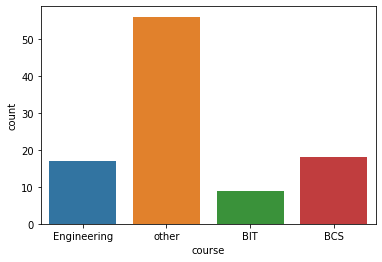

In [266]:
df["course"] = df["course"].apply(getCourse)
sns.countplot(df["course"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

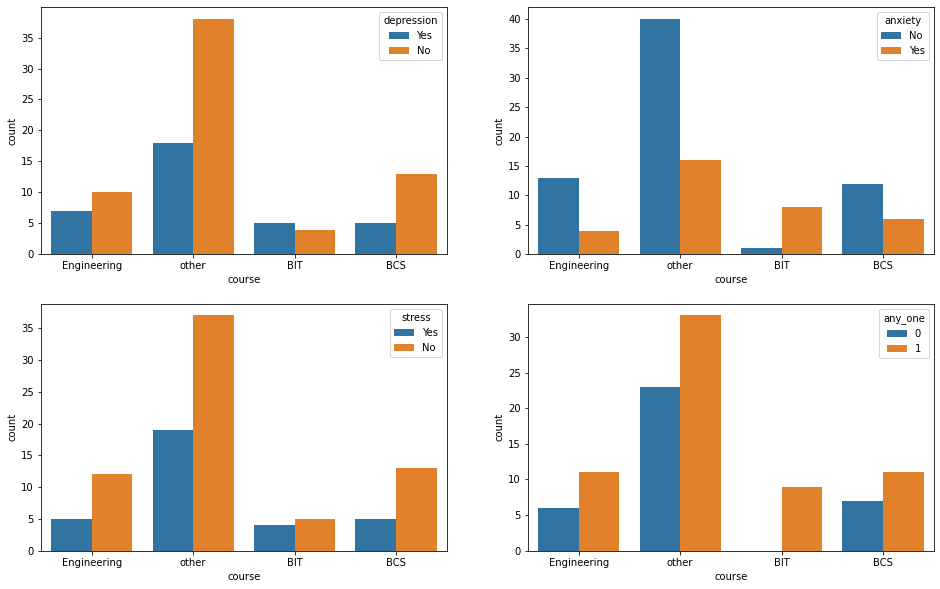

In [267]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["course"],hue=df['depression'])
plt.subplot(2,2,2)
sns.countplot(df["course"],hue=df['anxiety'])
plt.subplot(2,2,3)
sns.countplot(df["course"],hue=df['stress'])
plt.subplot(2,2,4)
sns.countplot(df["course"],hue=df['any_one'])

Every student studying BIT is suffering from atleast one problem

BIT must suck 

Lets check for CGPA

CGPA is a should be a numerical variable so I am going to extract it from the CGPA column

In [268]:
df["CGPA"].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         3
2.00 - 2.49      2
3.50 - 4.00      1
Name: CGPA, dtype: int64

Lets convert CGPA into 3 categories : "low", "mid","high"

In [269]:
def getCGPA(text):
  if int(text[0]) < 3:
    return "low"
  else:
    if int(text[2]) == 0:
      return "mid"
    else:
      return "high"

In [270]:
df["CGPA_val"] = df["CGPA"].apply(getCGPA)

In [271]:
df["CGPA_val"].value_counts()

high    48
mid     43
low      9
Name: CGPA_val, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


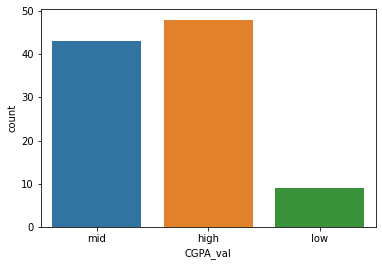

In [272]:
sns.countplot(df["CGPA_val"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

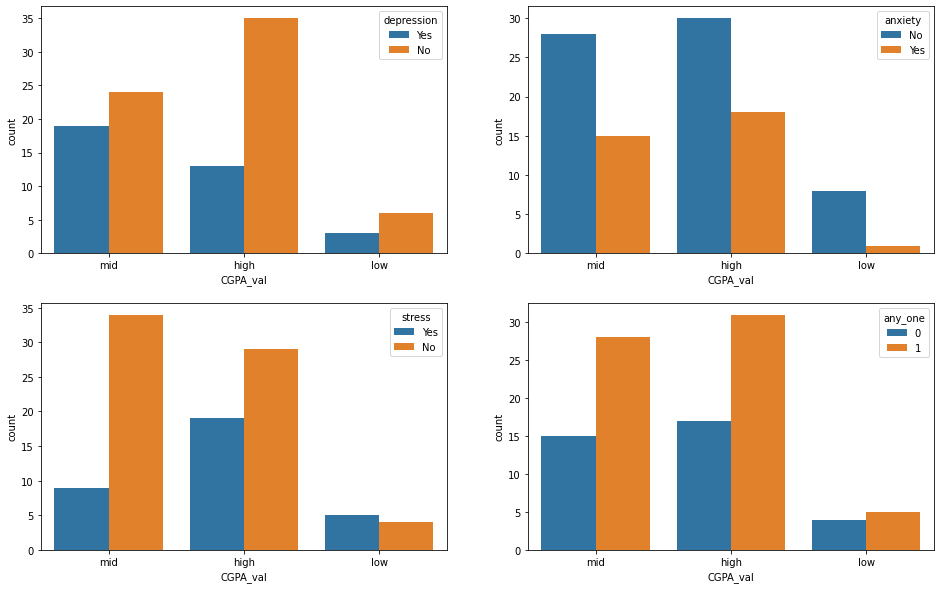

In [273]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["CGPA_val"],hue=df['depression'])
plt.subplot(2,2,2)
sns.countplot(df["CGPA_val"],hue=df['anxiety'])
plt.subplot(2,2,3)
sns.countplot(df["CGPA_val"],hue=df['stress'])
plt.subplot(2,2,4)
sns.countplot(df["CGPA_val"],hue=df['any_one'])

We see similar ratio between Yes and No regardless of CGPA

so, even high CGPA students have problems

relation between marital status and any_one

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


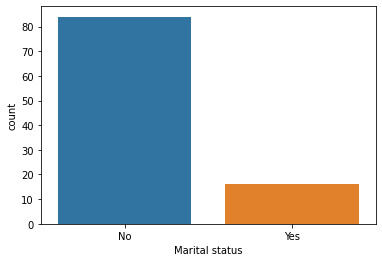

In [274]:
sns.countplot(df["Marital status"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

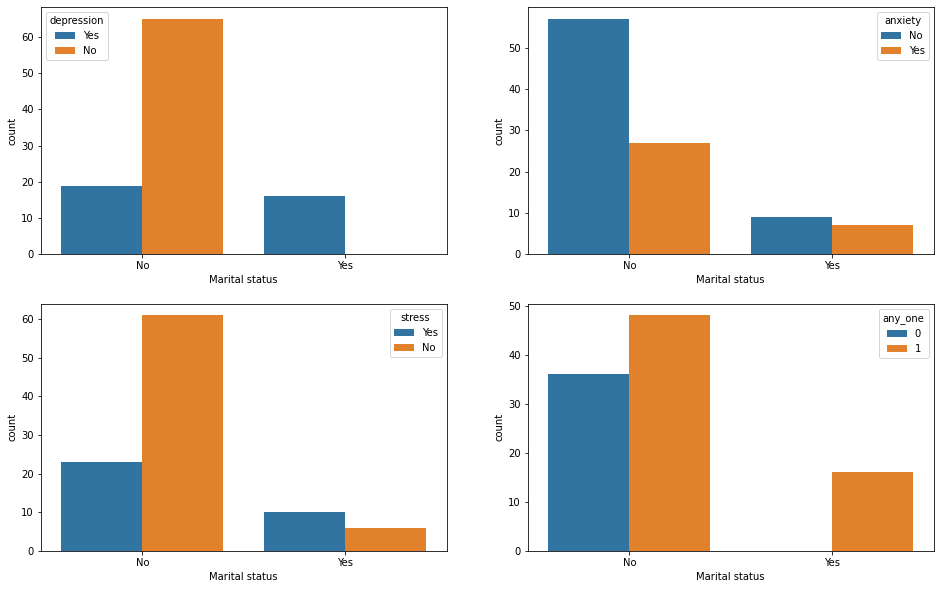

In [275]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df["Marital status"],hue=df['depression'])
plt.subplot(2,2,2)
sns.countplot(df["Marital status"],hue=df['anxiety'])
plt.subplot(2,2,3)
sns.countplot(df["Marital status"],hue=df['stress'])
plt.subplot(2,2,4)
sns.countplot(df["Marital status"],hue=df['any_one'])

Every married person if suferring from atleast one problem (DUH!)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


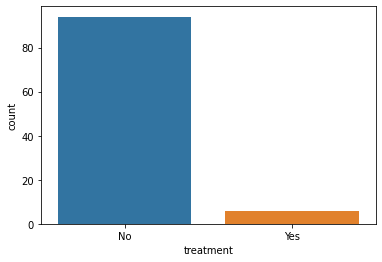

In [276]:
sns.countplot(df["treatment"])

Lets just drop the treatment column

In [277]:
df = df.drop("treatment",axis=1)

At last! lets check age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


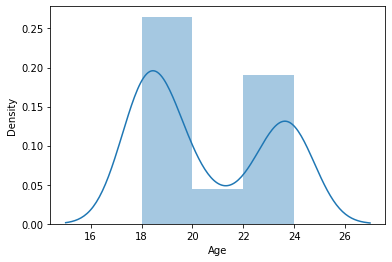

In [278]:
sns.distplot(df["Age"])

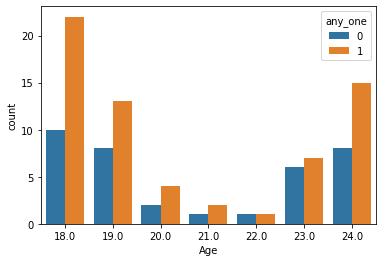

In [279]:
sns.countplot(x=df["Age"],hue=df["any_one"])

In every age group there are more people with atleast one problem

#### data preprocessing

we already did some data preprocessing during EDA, lets finish it now

In [280]:
df

,gender,Age,course,year,CGPA,Marital status,depression,anxiety,stress,depression_num,anxiety_num,stress_num,any_one,CGPA_val
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,1,0,1,1,mid
1,Male,21.0,other,year 2,3.00 - 3.49,No,No,Yes,No,0,1,0,1,mid
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,1,1,1,1,mid
3,Female,22.0,other,year 3,3.00 - 3.49,Yes,Yes,No,No,1,0,0,1,mid
4,Male,23.0,other,year 4,3.00 - 3.49,No,No,No,No,0,0,0,0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,0,1,0,1,high
97,Male,18.0,Engineering,year 2,3.00 - 3.49,No,Yes,Yes,No,1,1,0,1,mid
98,Female,19.0,other,year 3,3.50 - 4.00,Yes,Yes,No,Yes,1,0,1,1,high
99,Female,23.0,other,year 4,3.50 - 4.00,No,No,No,No,0,0,0,0,high


In [281]:
df_bpre = df.drop(["depression","anxiety","stress","CGPA","any_one"],axis=1)

In [282]:
df_bpre.head(2)

,gender,Age,course,year,Marital status,depression_num,anxiety_num,stress_num,CGPA_val
0,Female,18.0,Engineering,year 1,No,1,0,1,mid
1,Male,21.0,other,year 2,No,0,1,0,mid


Time to convert categorical columns into numerical columns using ohe

In [283]:
gender_ohe = pd.get_dummies(df_bpre["gender"])
course_ohe = pd.get_dummies(df_bpre["course"])
marital_ohe = pd.get_dummies(df_bpre["Marital status"])
year_ohe = pd.get_dummies(df_bpre["year"])
cgpa_ohe = pd.get_dummies(df_bpre["CGPA_val"])

In [284]:
df_fin = pd.concat([df_bpre,gender_ohe,course_ohe,marital_ohe,year_ohe,cgpa_ohe],axis=1)
df_fin.head(2)

,gender,Age,course,year,Marital status,depression_num,anxiety_num,stress_num,CGPA_val,Female,...,other,No,Yes,year 1,year 2,year 3,year 4,high,low,mid
0,Female,18.0,Engineering,year 1,No,1,0,1,mid,1,...,0,1,0,1,0,0,0,0,0,1
1,Male,21.0,other,year 2,No,0,1,0,mid,0,...,1,1,0,0,1,0,0,0,0,1


In [285]:
df_f = df_fin.drop(["gender","course","Marital status","year","CGPA_val"],axis=1)
df_f.head(2)

,Age,depression_num,anxiety_num,stress_num,Female,Male,BCS,BIT,Engineering,other,No,Yes,year 1,year 2,year 3,year 4,high,low,mid
0,18.0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,21.0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1


#### Machine Learning
our favorite part machine learning

**DEPRESSION**

In [286]:
from sklearn.model_selection import train_test_split
df_dep = df_f.drop(["anxiety_num","stress_num"],axis=1)
X = df_dep.drop(["depression_num"],axis=1)
y = df_dep["depression_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
X_train.columns

Index(['Age', 'Female', 'Male', 'BCS', 'BIT', 'Engineering', 'other', 'No',
       'Yes', 'year 1', 'year 2', 'year 3', 'year 4', 'high', 'low', 'mid'],
      dtype='object')

Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(f"test: {lr.score(X_test,y_test)} train : {lr.score(X_train,y_train)}")

test: 0.85 train : 0.825


Guassian Naive Bayes

In [289]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print(f"test: {nb.score(X_test,y_test)} train : {nb.score(X_train,y_train)}")

test: 0.85 train : 0.8


Decision Trees

In [290]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print(f"test: {dtc.score(X_test,y_test)} train : {dtc.score(X_train,y_train)}")

test: 0.75 train : 0.9375


**ANXIETY**

In [291]:
from sklearn.model_selection import train_test_split
df_an = df_f.drop(["depression_num","stress_num"],axis=1)
X = df_an.drop(["anxiety_num"],axis=1)
y = df_an["anxiety_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
X_train

,Age,Female,Male,BCS,BIT,Engineering,other,No,Yes,year 1,year 2,year 3,year 4,high,low,mid
56,23.0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0
89,24.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
26,19.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
42,20.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
70,24.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,19.0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
72,19.0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
14,18.0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
93,18.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1


Logistic Regression

In [293]:
from sklearn.linear_model import LogisticRegression
lra = LogisticRegression()
lra.fit(X_train,y_train)
print(f"test: {lra.score(X_test,y_test)} train : {lra.score(X_train,y_train)}")

test: 0.85 train : 0.7


In [294]:
from sklearn.naive_bayes import GaussianNB
nba = GaussianNB()
nba.fit(X_train,y_train)
print(f"test: {nba.score(X_test,y_test)} train : {nba.score(X_train,y_train)}")

test: 0.85 train : 0.6875


**STRESS**

In [295]:
from sklearn.model_selection import train_test_split
df_an = df_f.drop(["depression_num","anxiety_num"],axis=1)
X = df_an.drop(["stress_num"],axis=1)
y = df_an["stress_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [296]:
from sklearn.linear_model import LogisticRegression
lrs = LogisticRegression()
lrs.fit(X_train,y_train)
print(f"test: {lrs.score(X_test,y_test)} train : {lrs.score(X_train,y_train)}")

test: 0.65 train : 0.725


Guassian Naive Bayes

In [297]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(X_train,y_train)
print(f"test: {nbs.score(X_test,y_test)} train : {nbs.score(X_train,y_train)}")

test: 0.55 train : 0.6875


Decision Trees

In [298]:
from sklearn.tree import DecisionTreeClassifier
dts = DecisionTreeClassifier()
dts.fit(X_train,y_train)
print(f"test: {dts.score(X_test,y_test)} train : {dts.score(X_train,y_train)}")

test: 0.55 train : 0.9375


I am going to use Logistic Regression for all variables

In [299]:
import pickle

In [300]:
pickle.dump(lr, open(model_path + "_depression.pkl", 'wb'))
pickle.dump(lra, open(model_path + "_anxiety.pkl", 'wb'))
pickle.dump(lrs, open(model_path + "_stress.pkl", 'wb'))